In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("carprices.csv")
df


,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


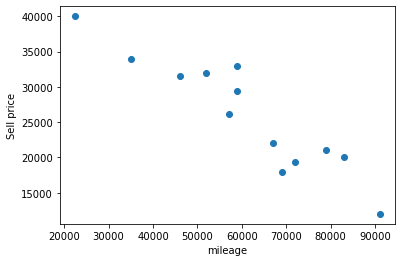

In [10]:
plt.xlabel('mileage')
plt.ylabel('Sell price')
plt.scatter(df.Mileage,df["Sell Price($)"])

In [14]:
a =pd.get_dummies(df["Car Model"],drop_first=True)

In [20]:
final = pd.concat([df,a],axis='columns')
final = final.drop("Car Model",axis='columns')
final

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


In [23]:
X = final.drop("Sell Price($)",axis='columns')
Y= final['Sell Price($)']
X

,Mileage,Age(yrs),BMW X5,Mercedez Benz C class
0,69000,6,1,0
1,35000,3,1,0
2,57000,5,1,0
3,22500,2,1,0
4,46000,4,1,0
5,59000,5,0,0
6,52000,5,0,0
7,72000,6,0,0
8,91000,8,0,0
9,67000,6,0,1


In [24]:
Y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [27]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,Y)

LinearRegression()

In [32]:
reg.predict([[45000,4,0,1]])

array([36991.31721061])

In [33]:
reg.predict([[86000,7,1,0]])

array([11080.74313219])

In [34]:
reg.score(X,Y)

0.9417050937281082